<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/Masters_4_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [45]:
import pickle

pkl_file = open('drive/My Drive/Top-Ex/article_topic.pkl', 'rb')
article_topic = pickle.load(pkl_file)
pkl_file.close()

In [46]:
pkl_file = open('drive/My Drive/Top-Ex/data_lemmatized.pkl', 'rb')
data_lemmatized = pickle.load(pkl_file)
pkl_file.close()


In [47]:
article_topic['lemmatized'] = data_lemmatized

In [48]:
article_topic['text']  = article_topic.lemmatized.apply(lambda x: ' '.join(x))

In [49]:
# article_topic = article_topic[['text', 'Topic_01', 'Topic_02', 'Topic_03', 'Topic_04',
#        'Topic_05', 'Topic_06', 'Topic_07', 'Topic_08', 'Topic_09', 'Topic_10',
#        'Topic_11']]

In [50]:
article_topic.head()

,title,content,Topic_01,Topic_02,Topic_03,Topic_04,Topic_05,Topic_06,Topic_07,Topic_08,Topic_09,Topic_10,Topic_11,lemmatized,text
0,Trump says his ’massive’ tax plan is coming ne...,’ ’ ’ President Donald Trump said that he e...,0.290998,0.010906,0.450176,0.005970,0.061371,0.014272,0.008211,0.055154,0.005457,0.092393,0.005092,"[say, massive, tax, plan, come, next, week, pr...",say massive tax plan come next week president ...
1,Chicago police have ’no regard’ for minority l...,Police in Chicago have ”no regard for the san...,0.058792,0.002780,0.009205,0.431409,0.001869,0.102680,0.018864,0.058535,0.009905,0.275659,0.030303,"[regard, minority, live, say, life, come, peop...",regard minority live say life come people colo...
2,A Concussion Can Lead To Sleep Problems That L...,People who sustain a concussion or a more seve...,0.020495,0.157279,0.050228,0.017358,0.015984,0.086818,0.002245,0.043450,0.002179,0.010960,0.593004,"[concussion, lead, sleep, problem, last, year,...",concussion lead sleep problem last year people...
3,Trump: I Was Just Joking When I Made Crude Co...,’You can watch the interview here:’] Trump’s c...,0.174913,0.012685,0.036574,0.041777,0.010217,0.084963,0.197679,0.412116,0.005444,0.018977,0.004655,"[joking, make, crude, comment, woman, watch, i...",joking make crude comment woman watch intervie...
4,"Beyoncé Dropped Out Of Coachella, Because Duh","’ It has happened, friends: Beyoncé has offici...",0.028872,0.145885,0.064897,0.074325,0.158659,0.171485,0.006119,0.210629,0.004514,0.019160,0.115456,"[drop, coachella, happen, friend, officially, ...",drop coachella happen friend officially cancel...


In [52]:
import pickle

filehandler = open("drive/My Drive/Top-Ex/article_topic_2.pkl","wb")
pickle.dump(article_topic,filehandler)
filehandler.close()

In [8]:
articles = article_topic[['text']]
articles.head()

,text
0,say massive tax plan come next week president ...
1,regard minority live say life come people colo...
2,concussion lead sleep problem last year people...
3,joking make crude comment woman watch intervie...
4,drop coachella happen friend officially cancel...


In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
# import shap

# shap.initjs()

In [10]:
corpus_train, corpus_test, y_train, y_test = train_test_split(article_topic.text.to_list(), article_topic.Topic_01.to_list(), test_size=0.2, random_state=7)

In [11]:
del article_topic

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# count = CountVectorizer()
# bag = count.fit_transform(article_topic.text)
# bag

vectorizer = CountVectorizer(min_df=10)
# bag_of_words = count.fit_transform(articles.text.to_list())

X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [13]:
del articles

In [14]:
len(vectorizer.get_feature_names())

22630

In [15]:
from sklearn.linear_model import LinearRegression

model = sklearn.linear_model.LinearRegression()
reg = model.fit(X_train, y_train)

In [16]:
reg.score(X_train, y_train)

0.831650246476623

In [17]:
%%capture
!pip install shap
import shap

shap.initjs()

In [18]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="interventional")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray()

The option feature_dependence has been renamed to feature_perturbation!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [19]:
# X_test_array = X_train.toarray()

In [23]:
corpus_test[0]

'source board know reilly tear dinner tor project serial sexual professional harassment powerful charismatic figure information security world work tor advocate security researcher developer hold together tell public false claim sex member tor community multiple source tell do many people count tell dark allegation come group disgust tor community member gather share story cry accord knowledge dinner tor director tell hope counseling help may finally force tor allegation sexual_misconduct past week tor project nonprofit maintain promote anonymous internet route software name announce mostly anonymous allegation publish online include serious accusation rape statement denied_wrongdoe call story calculate targeted attack launch spread vicious spurious allegation separate statement publish last week tor project executive director meeting acknowledge type allegation entirely new tor consistent rumor hearing time account dinner make clear important people tor know gather early evening resta

In [25]:
y_test[0]

0.26643499732017517

In [21]:
shap.initjs()
ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names()
)

In [30]:
shap.initjs()
ind = 981
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names()
)

In [33]:
corpus_test[981]

'session recuse future investigation campaign say would recuse investigation involve campaign firestorm contact russian official election stand firm answer give confirmation_hearing past communication session hold say would recuse investigation matter relate way campaign open inquiry contact session may russian official spring summer last part investigation possible contact russian operative unclear session contact still examine session deny confirmation_hearing ever communicate russian official top campaign surrogate session emphasize meet russian operative campaign election let clear never meet russian operative russian intermediary campaign say part continue exchange information campaign surrogate intermediarie russian government totally false session answer unrelated question say communication franken ask session specifically speak russian operative rather ask campaign contact generally evidence affiliate campaign communicate russian government course campaign ask aware activity se

In [29]:
import numpy as np
np.argmax(y_test)

981

In [37]:
features = vectorizer.get_feature_names()

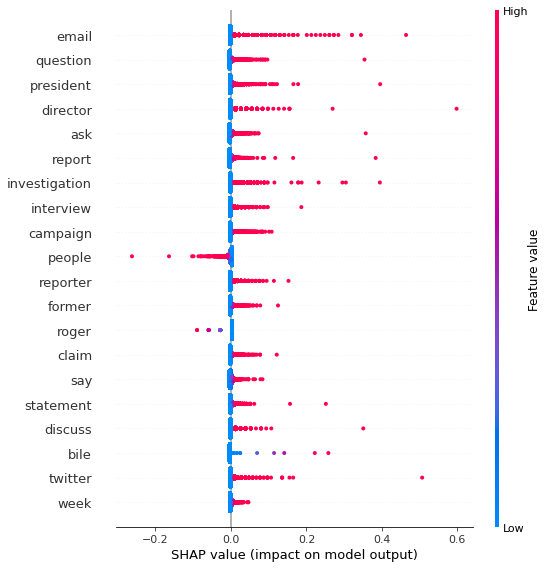

In [34]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [38]:
shap.dependence_plot(5, shap_values, X_train, feature_names=vectorizer.get_feature_names())

IndexError: ignored

In [43]:
shap.force_plot(explainer.expected_value, shap_values[0:2,:], X_test[0:2,:], plot_cmap="DrDb", feature_names=features)


IndexError: ignored

In [ ]:
# import pandas as pd
# k = pd.DataFrame(bag_of_words.toarray(), columns=count.get_feature_names())
# k.head()